In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("zuu crew scores.csv")
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [20]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [21]:
X = np.column_stack([df['TotalHours'].values, df['Attendance'].values, df['AssignmentsCompleted'].values, df['GitHubScore'].values]).reshape(-1, 4)
Y = df['CapstoneScore'].values

In [22]:
def compute_cost(X, Y, beta):
    m = len(Y)
    y_hat = X.dot(beta)
    cost = (1/(2*m)) * np.sum((y_hat - Y) ** 2)

    return cost

In [23]:
X_with_bias = np.column_stack([np.ones((len(X))), X])
X_with_bias

array([[ 1. , 43.7, 79.9,  2. , 62.8],
       [ 1. , 95.6, 76.8,  6. , 87.4],
       [ 1. , 75.9, 96.6,  8. , 98.4],
       [ 1. , 24. , 83.2,  6. , 41.8],
       [ 1. , 88. , 86.5,  5. , 23.9],
       [ 1. , 97.3, 76.6,  6. , 29.6],
       [ 1. , 26.5, 83.8,  3. , 98.8],
       [ 1. , 57.2, 90. ,  5. , 38.4],
       [ 1. , 48.9, 68.4,  9. , 68. ],
       [ 1. , 36.2, 95.9,  3. , 21.8],
       [ 1. , 65.1, 68.2,  4. , 95. ],
       [ 1. , 22.6, 67.6,  2. , 78.6],
       [ 1. , 36.3, 61.5,  2. ,  8.9],
       [ 1. , 51. , 82.6,  6. , 87.9],
       [ 1. , 56.3, 78.1,  2. , 61.3],
       [ 1. , 15.9, 66.2,  4. , 65. ],
       [ 1. , 96.9, 94.5,  2. , 51.3],
       [ 1. , 18.8, 70.8,  4. , 22. ],
       [ 1. , 54.6, 66.2,  6. ,  5.8],
       [ 1. , 91.8, 86.4,  9. , 88.4],
       [ 1. , 69.6, 68.9, 10. , 99.5],
       [ 1. , 38.1, 69.2,  6. , 17.4],
       [ 1. , 26.6, 64.2,  6. , 69.6],
       [ 1. , 97.3, 92. , 10. , 15.4],
       [ 1. , 94.6, 86.1,  4. , 22.4],
       [ 1. , 27.6, 94.2,

In [24]:
beta = np.random.randn(5)
print(f"Initial beta parameters: {beta}")

Initial beta parameters: [ 0.95552891  0.85187475 -0.61134772  0.67630341 -0.39607787]


In [25]:
y_hat = X_with_bias.dot(beta)
y_hat

array([-34.18531073,   4.88386453, -27.00700255, -41.96184178,
        16.95418504,  29.34762211, -64.80431244, -17.16640331,
       -20.0505444 , -33.44043866, -20.20352352, -50.89832135,
        -7.8917886 , -36.85360487, -21.75714623, -49.01072948,
         6.76364465, -32.32114373,   8.75724002,  -2.58936524,
       -14.52256055, -11.72723975, -39.14232565,  28.26238668,
        22.73891085, -35.3733848 , -16.41602596, -42.58739642,
       -50.54027555, -32.63170973,  20.7743913 , -55.65653818,
       -61.68305816,  13.25352466,  -4.28669012,  21.23855693,
       -59.04145962, -18.76031171, -68.31723827, -17.73984255,
         5.65427993,  -3.13587763, -21.00196457,  -5.07644444,
       -16.13962916, -17.71147084, -15.71563351, -82.199925  ,
       -13.03976209,  -3.22545198,  16.81308634, -26.59466806,
       -32.86749302,   3.23028485,  -6.96340376,   1.21045285,
        36.06300533, -35.02599682,   7.76037682,  -0.93333566,
       -31.99848189,  -3.39258592, -23.48587412,  13.40

In [26]:
cost = compute_cost(X_with_bias, Y, beta)
print("Initial Cost:", cost)

Initial Cost: 2805.4360043451547


In [27]:
def gradient_descent(X, Y, beta, lr, n_iter):
    m = len(Y)
    cost_history = []

    for i in range(n_iter):
        y_hat = X.dot(beta)

        gradients = (1 / m) * X.T.dot(y_hat - Y)

        beta = beta - lr * gradients

        cost = compute_cost(X, Y, beta)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration : {i}, Cost: {cost:.4f}")

    return beta, cost_history

In [28]:
lr = 0.00001
n_iter = 10000

beta, cost_history = gradient_descent(X_with_bias, Y, beta, lr, n_iter)

Iteration : 0, Cost: 2150.0663
Iteration : 1000, Cost: 14.3835
Iteration : 2000, Cost: 14.1936
Iteration : 3000, Cost: 14.0337
Iteration : 4000, Cost: 13.8943
Iteration : 5000, Cost: 13.7727
Iteration : 6000, Cost: 13.6666
Iteration : 7000, Cost: 13.5740
Iteration : 8000, Cost: 13.4933
Iteration : 9000, Cost: 13.4228


In [29]:
print(f"best beta : {beta}")

best beta : [0.98053225 0.6167876  0.19722456 0.37062437 0.02913561]


In [30]:
print(f"final cost : {cost_history[-1]}")

final cost : 13.361406032805935


In [31]:
y_hat = X_with_bias.dot(beta)
y_hat

array([46.26335794, 79.86247161, 72.67854273, 35.634133  , 74.86722858,
       79.18752741, 37.84329334, 56.98292286, 49.94844672, 43.96910837,
       58.8345005 , 31.2836201 , 36.49978841, 53.512215  , 53.63617405,
       27.22003326, 81.6208773 , 28.6631191 , 50.106134  , 80.55304327,
       64.10295835, 40.85878538, 34.30048398, 83.29355753, 78.44480912,
       37.58880666, 44.3002558 , 40.46264275, 51.33761028, 40.01019988,
       80.17596009, 42.87604524, 29.7790159 , 61.64294092, 66.28404583,
       70.36911543, 29.18659962, 42.92706776, 34.17152286, 62.77722347,
       64.52619281, 68.74578082, 58.66392699, 71.72293923, 52.42590486,
       52.75176559, 52.74375618, 31.84986162, 61.47453109, 39.91587261,
       76.17431732, 38.93476811, 47.40598058, 75.29119113, 63.65228259,
       74.6401432 , 72.05537102, 60.18484132, 71.30632018, 69.24079441,
       23.33599934, 54.64341595, 50.21022307, 81.33971179, 41.55294043,
       59.25918266, 71.59097228, 48.49400551, 79.42646944, 41.86

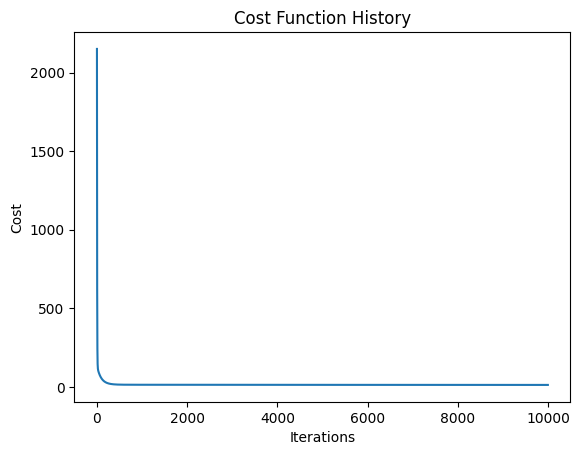

In [32]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [33]:
def MSE(Y, y_hat):
    e_i = Y - y_hat
    return np.mean(e_i ** 2)

def MAE(Y, y_hat):
    e_i = Y - y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y, y_hat):
    y_mean = np.mean(Y)

    e_i = Y - y_hat
    std_i = Y - y_mean

    E = np.sum(e_i ** 2) / np.sum(std_i ** 2)
    return 1 - E

In [34]:
mse = MSE(Y, y_hat)
mae = MAE(Y, y_hat)
r2 = R2_Score(Y, y_hat)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MSE: 26.722812065611873
MAE: 3.8870631614779776
R2 Score: 0.9064749152095674
